# Introduction to Statistics in Python

## Part I

In [85]:
# Importing numpy and pandas
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import matplotlib as mpl 

# Importing the course datasets
deals = pd.read_csv("datasets/amir_deals.csv")
happiness = pd.read_csv("datasets/world_happiness.csv")
food = pd.read_csv("datasets/food_consumption.csv")

plt.rcParams['figure.figsize'] = [7, 5]

pd.set_option('display.expand_frame_repr', False)

warnings.filterwarnings("ignore")

mpl.rcParams['axes.grid'] = True
plt.style.use('seaborn')

# **Mean and median**

In this chapter, you'll be working with the 2018 Food Carbon Footprint Index from nu3. The food_consumption dataset contains information about the kilograms of food consumed per person per year in each country in each food category (consumption) as well as information about the carbon footprint of that food category (co2_emissions) measured in kilograms of carbon dioxide, or CO2, per person per year in each country.

In this exercise, you'll compute measures of center to compare food consumption in the US and Belgium using your pandas and numpy skills.

pandas is imported as pd for you and food_consumption is pre-loaded.

In [86]:
food_consumption = pd.read_csv('./datasets/food_consumption.csv', index_col=0)
display(food_consumption.head())

# Subset for Belgium and USA only
be_and_usa = food_consumption[(food_consumption['country'] == 'Belgium') | (food_consumption['country'] == 'USA')]

# Group by country, select consumption column, and compute mean and median
print(be_and_usa.groupby('country')['consumption'].agg([np.mean, np.median]))

,country,food_category,consumption,co2_emission
1,Argentina,pork,10.51,37.20
2,Argentina,poultry,38.66,41.53
3,Argentina,beef,55.48,1712.00
4,Argentina,lamb_goat,1.56,54.63
5,Argentina,fish,4.36,6.96


              mean  median
country                   
Belgium  42.132727   12.59
USA      44.650000   14.58


In [87]:
# Filter for Belgium
be_consumption =food_consumption[food_consumption['country'] == 'Belgium'] 

# Filter for USA
usa_consumption = food_consumption[food_consumption['country'] == 'USA'] 

# Calculate mean and median consumption in Belgium
print(np.mean(be_consumption['consumption']))
print(np.median(be_consumption['consumption']))

# Calculate m)an and median consumption in USA
print(np.mean(usa_consumption['consumption']))
print(np.median(usa_consumption['consumption']))

42.13272727272727
12.59
44.650000000000006
14.58


- Subset food_consumption to get the rows where food_category is 'rice'.
- Create a histogram of co2_emission for rice and show the plot.

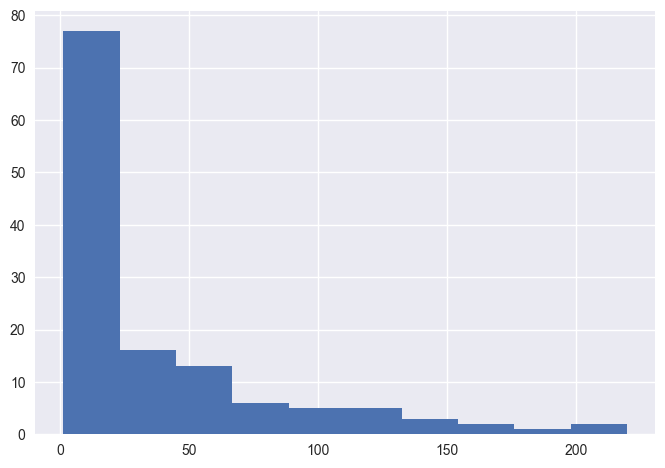

In [88]:

# Subset for food_category equals rice
rice_consumption = food_consumption[food_consumption['food_category'] == 'rice']

# Histogram of co2_emission for rice and show plot
rice_consumption.co2_emission.hist()
plt.show()

- Use .agg() to calculate the mean and median of co2_emission for rice.

In [89]:
rice_consumption = food_consumption[food_consumption['food_category'] == 'rice']

# Calculate mean and median of co2_emission with .agg()
print(rice_consumption.agg([np.mean, np.median]))

        consumption  co2_emission
mean      29.375154     37.591615
median    11.875000     15.200000


# **Measures of spread**

## *Quartiles, quantiles, and quintiles*

Quantiles are a great way of summarizing numerical data since they can be used to measure center and spread, as well as to get a sense of where a data point stands in relation to the rest of the data set. For example, you might want to give a discount to the 10% most active users on a website.

For example: 

In [90]:
# Calculate the quartiles of co2_emission
print(np.quantile(food_consumption['co2_emission'],np.linspace(0, 1, 5)))

[   0.        5.21     16.53     62.5975 1712.    ]


In [91]:
print(np.quantile(food_consumption['co2_emission'],np.linspace(0, 1, 6)))

[   0.       3.54    11.026   25.59    99.978 1712.   ]


In [92]:
#Calculate the eleven quantiles of co2_emission that split up the data into ten pieces (deciles).
print(np.quantile(food_consumption['co2_emission'],np.linspace(0, 1, 11)))

[0.00000e+00 6.68000e-01 3.54000e+00 7.04000e+00 1.10260e+01 1.65300e+01
 2.55900e+01 4.42710e+01 9.99780e+01 2.03629e+02 1.71200e+03]


Those are some high-quality quantiles! While calculating more quantiles gives you a more detailed look at the data, it also produces more numbers, making the summary more difficult to quickly understand.

# **Variance and standard deviation**

Average distance from each data point to the data's mean

calculating these in this exercise. Spread is important since it can help inform expectations. For example, if a salesperson sells a mean of 20 products a day, but has a standard deviation of 10 products, there will probably be days where they sell 40 products, but also days where they only sell one or two. Information like this is important, especially when making predictions.


                        var         std
food_category                          
beef           88748.408132  297.906710
dairy          17671.891985  132.935669
eggs              21.371819    4.622966
fish             921.637349   30.358481
lamb_goat      16475.518363  128.356996
nuts              35.639652    5.969895
pork            3094.963537   55.632396
poultry          245.026801   15.653332
rice            2281.376243   47.763754
soybeans           0.879882    0.938020
wheat             71.023937    8.427570


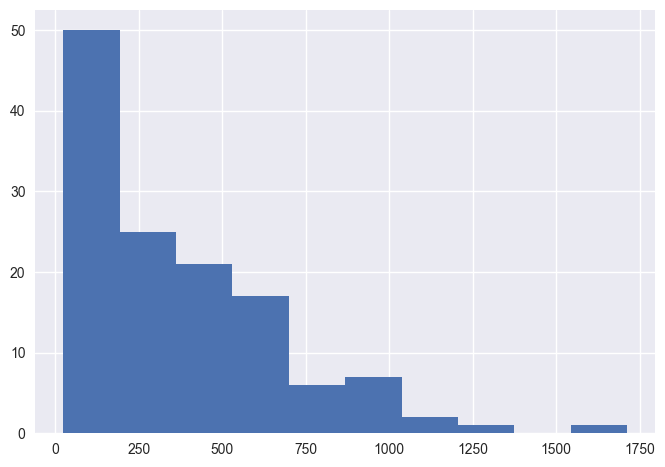

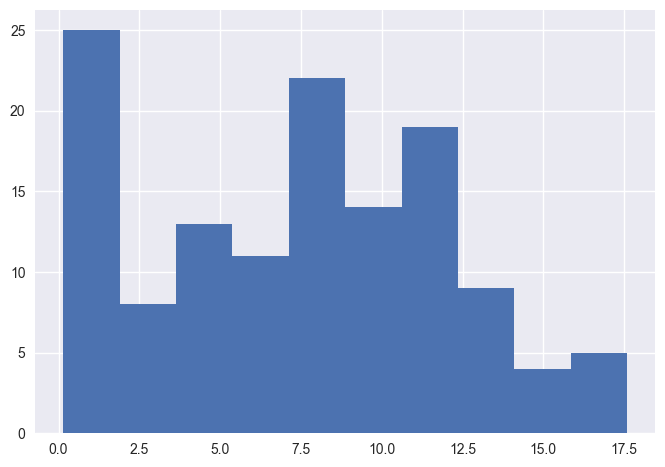

In [93]:
# Print variance and sd of co2_emission for each food_category
print(food_consumption.groupby('food_category')['co2_emission'].agg([np.var, np.std]))

# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Create histogram of co2_emission for food_category 'beef'
food_consumption[food_consumption['food_category']=='beef']["co2_emission"].hist()
# Show plot
plt.show()

# Create histogram of co2_emission for food_category 'eggs'
food_consumption[food_consumption['food_category']=='eggs']["co2_emission"].hist()
# Show plot
plt.show()

Beef has the largest amount of variation in its CO2 emissions, while eggs have a relatively small amount of variation.

# Finding outliers using IQR

Outliers can have big effects on statistics like mean, as well as statistics that rely on the mean, such as variance and standard deviation. Interquartile range, or IQR, is another way of measuring spread that's less influenced by outliers. IQR is also often used to find outliers. If a value is less than \text{Q1} - 1.5 \times \text{IQR}
 or greater than \text{Q3} + 1.5 \times \text{IQR}
, it's considered an outlier. In fact, this is how the lengths of the whiskers in a matplotlib box plot are calculated.


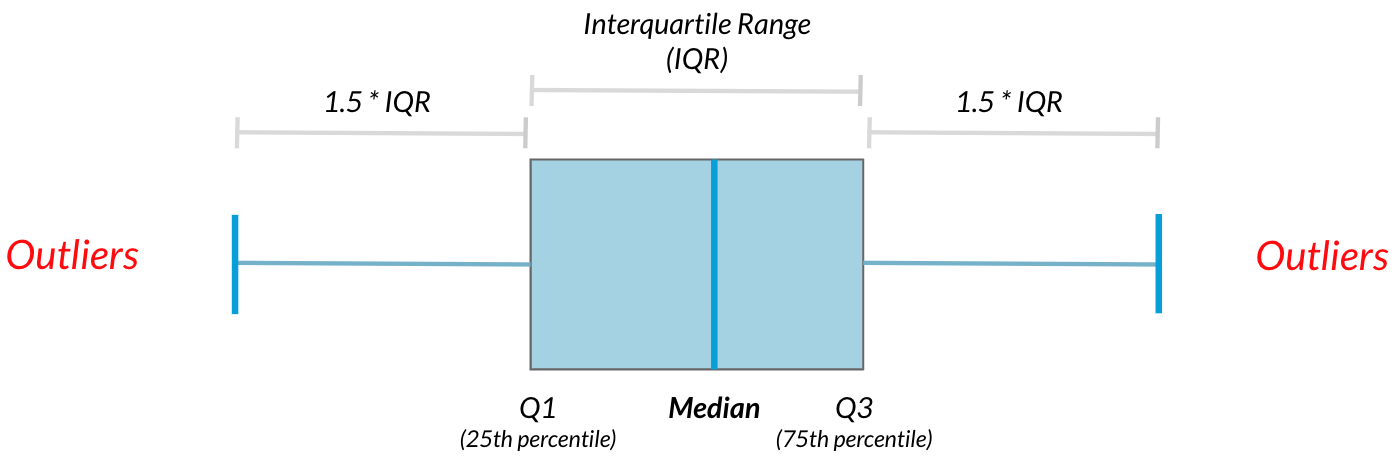

In [94]:
from IPython.display import Image
Image('iqr.jpeg')

In this exercise, you'll calculate IQR and use it to find some outliers. pandas as pd and numpy as np are loaded and food_consumption is available.

1. Calculate the total co2_emission per country by grouping by country and taking the sum of co2_emission. Store the resulting DataFrame as emissions_by_country

In [95]:
emissions_by_country = food_consumption.groupby('country')['co2_emission'].sum()

print(emissions_by_country)

country
Albania      1777.85
Algeria       707.88
Angola        412.99
Argentina    2172.40
Armenia      1109.93
              ...   
Uruguay      1634.91
Venezuela    1104.10
Vietnam       641.51
Zambia        225.30
Zimbabwe      350.33
Name: co2_emission, Length: 130, dtype: float64


In [96]:
display(emissions_by_country.sort_values())

country
Mozambique      141.40
Rwanda          181.63
Togo            188.09
Liberia         203.38
Malawi          207.94
                ...   
Iceland        1731.36
New Zealand    1750.95
Albania        1777.85
Australia      1938.66
Argentina      2172.40
Name: co2_emission, Length: 130, dtype: float64

2. Compute the first and third quartiles of emissions_by_country and store these as q1 and q3.


In [97]:
# Compute the first and third quantiles and IQR of emissions_by_country
q1 = np.quantile(emissions_by_country, 0.25)
q3 = np.quantile(emissions_by_country, 0.75)
iqr = q3 - q1

3. Calculate the lower and upper cutoffs for outliers of emissions_by_country, and store these as lower and upper

In [98]:
# Calculate the lower and upper cutoffs for outliers
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

4. Subset emissions_by_country to get countries with a total emission greater than the upper cutoff or a total emission less than the lower cutoff.

In [99]:
outliers = emissions_by_country[(emissions_by_country > upper) | (emissions_by_country < lower)]

print(outliers)

country
Argentina    2172.4
Name: co2_emission, dtype: float64
